# Gaussian mixture model

## Generate dataset

In [1]:
from collections import namedtuple
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multinomial
from scipy.stats import multivariate_normal
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [2]:
np.random.seed(82)

In [3]:
K = 3
N = 150

def p():
    pi = np.array([.45, .3, .25])
    mu = np.array([[6, 4], [2, 8], [1, 2]])
    cov = np.array([[[1, 0], [0, 1]], [[1, 0.5], [0.5, 2]], [[2, -1.5], [-1.5, 3]]])
    
    z = np.nonzero(multinomial(1, pi).rvs())[1][0]
    return multivariate_normal(mu[z], cov[z]).rvs(), z

data = {
    "data": [],
    "target": [],
    "target_names": [str(k) for k in range(K)]
}

for i in range(N):
    sample, z = p()
    data["data"].append(sample)
    data["target"].append(z)

data["data"] = np.array(data["data"])
data["target"] = np.array(data["target"])
data = namedtuple("data", data.keys())(*data.values())

X = data.data
Y = data.target

### Visualize

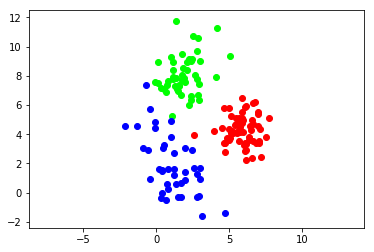

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

for k in range(K):
    color = [0]*K
    color[k] = 1
    scatter = ax.scatter(
        X[np.argwhere(Y==k),0],
        X[np.argwhere(Y==k),1],
        label=data.target_names[k],
        color=color
    )

ax.set_aspect('equal', 'datalim')
plt.show()

## learn gaussian mixture model

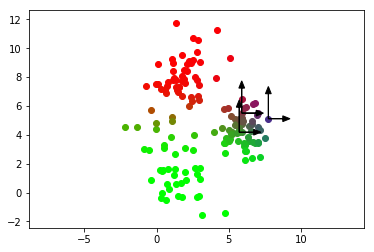

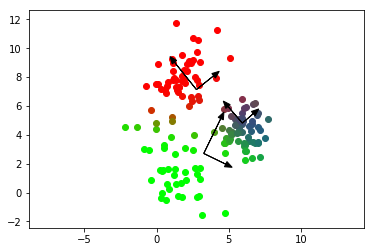

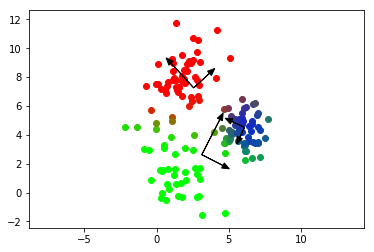

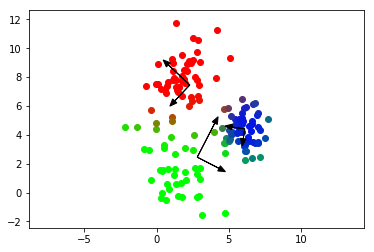

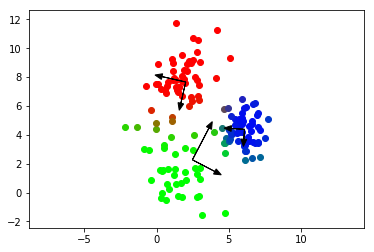

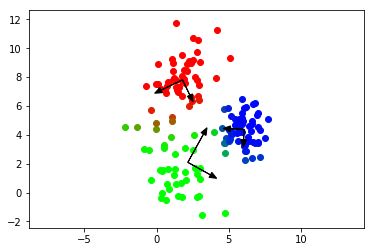

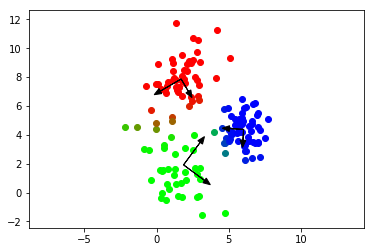

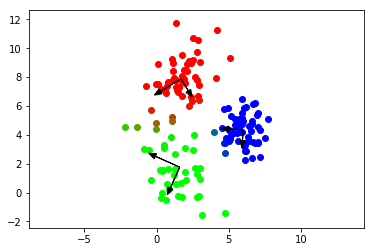

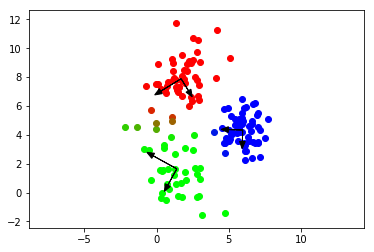

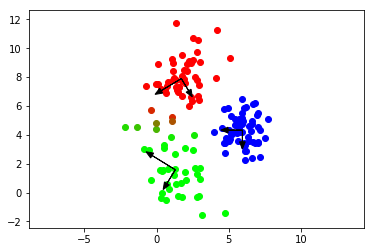

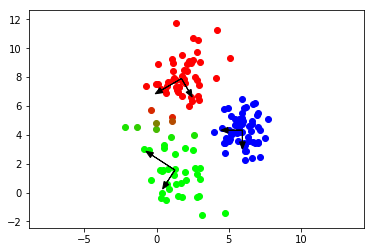

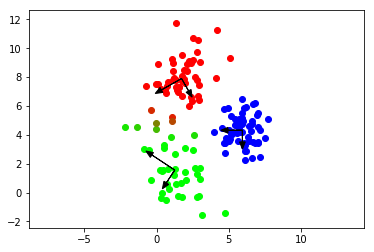

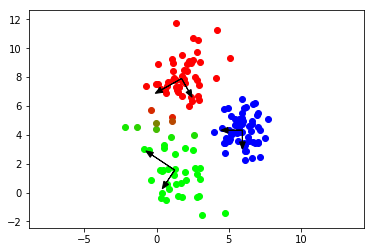

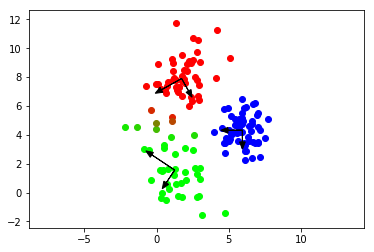

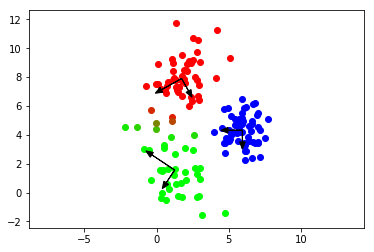

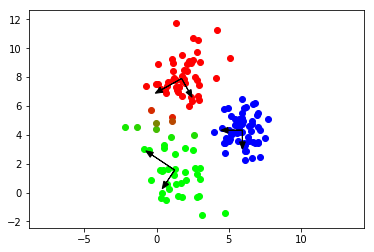

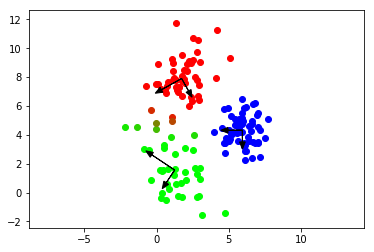

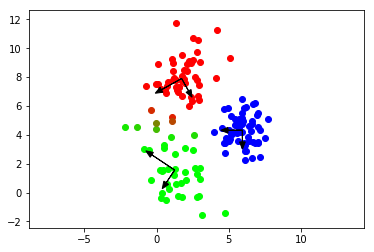

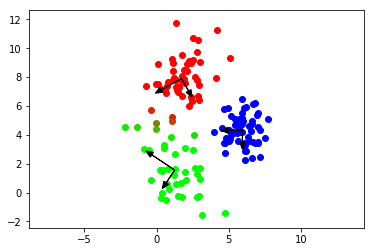

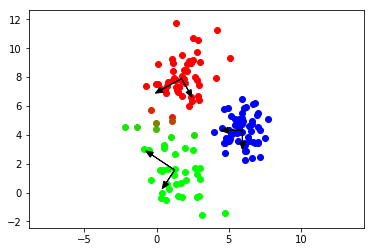

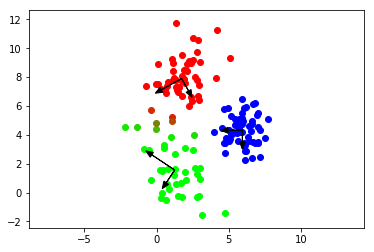

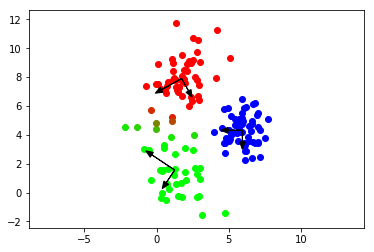

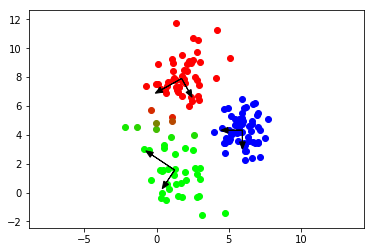

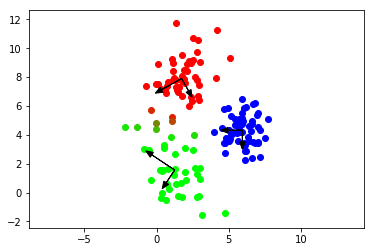

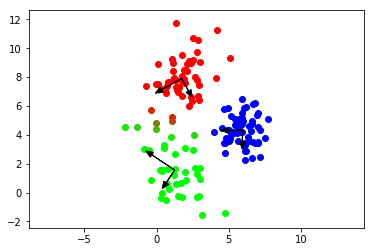

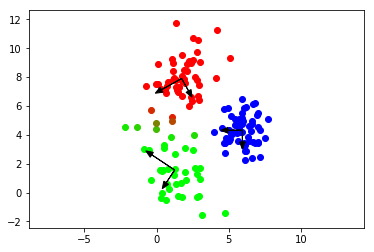

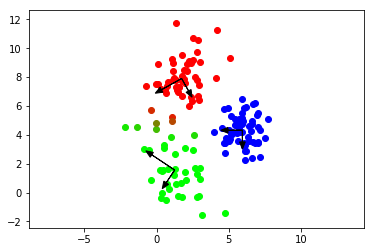

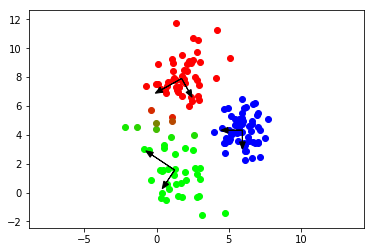

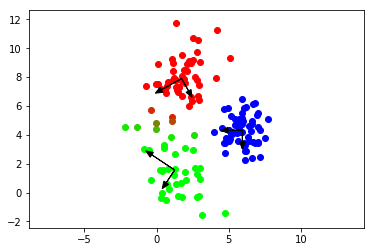

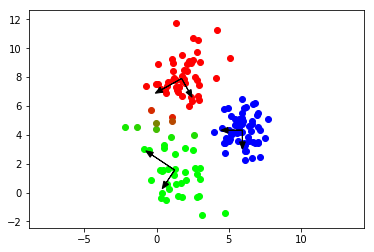

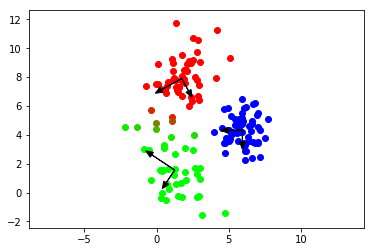

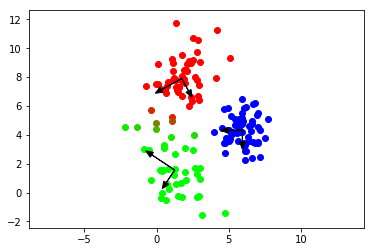

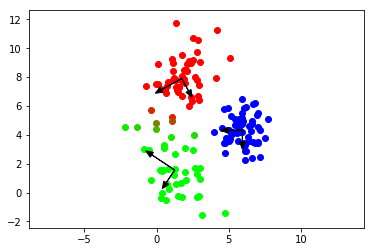

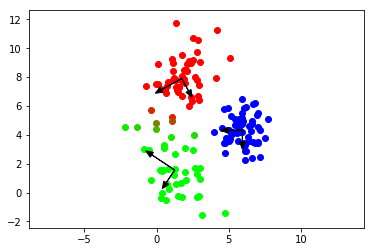

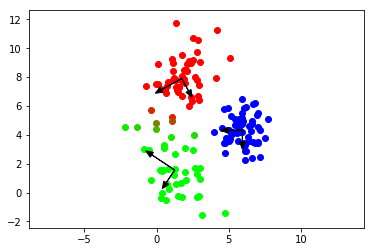

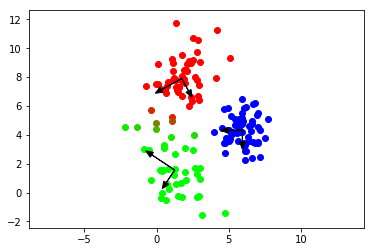

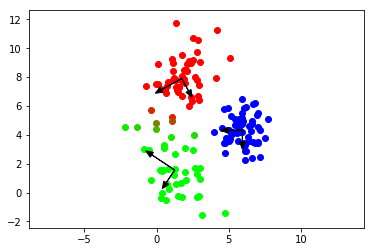

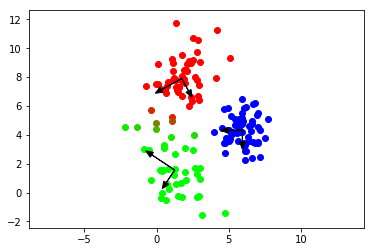

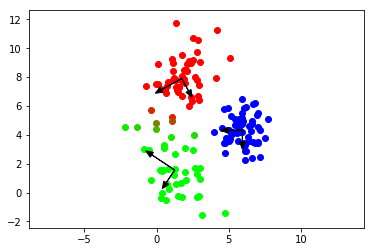

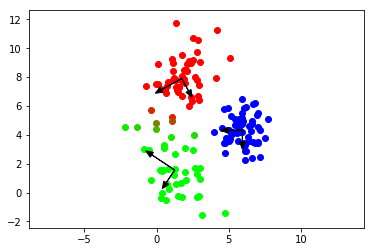

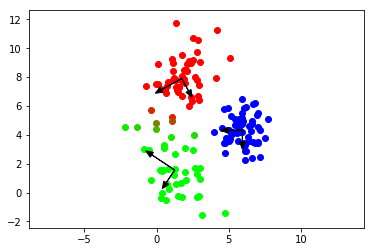

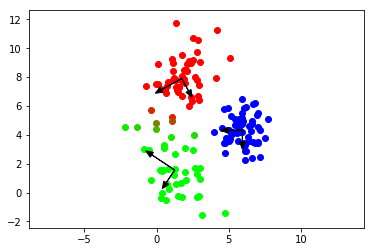

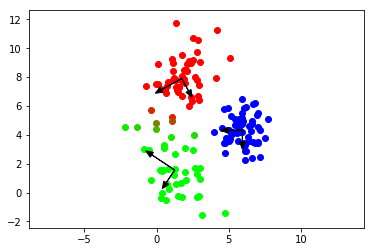

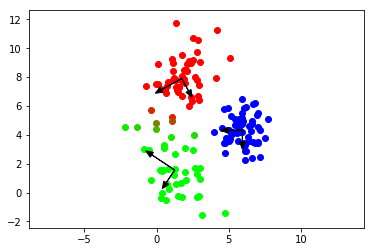

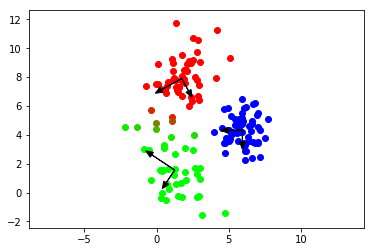

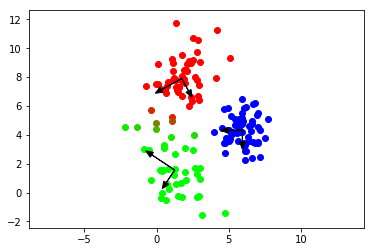

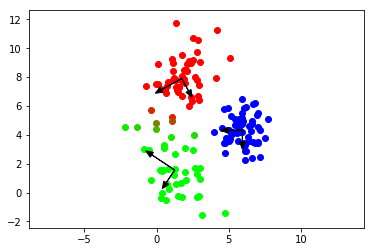

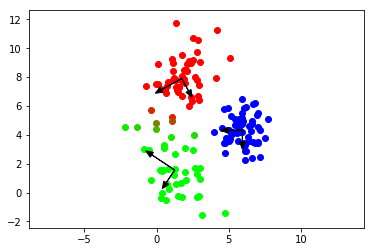

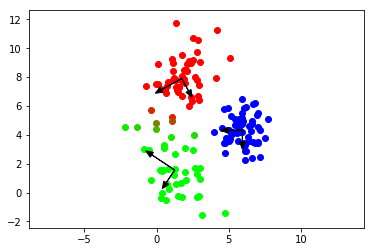

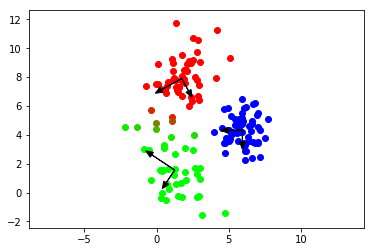

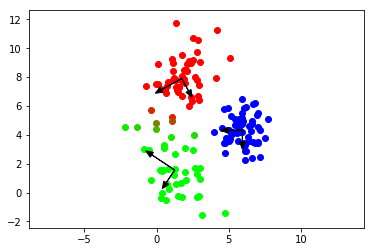

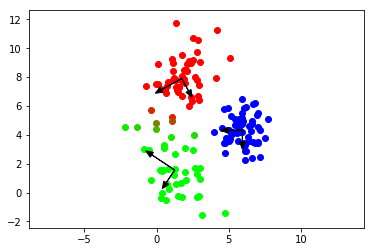

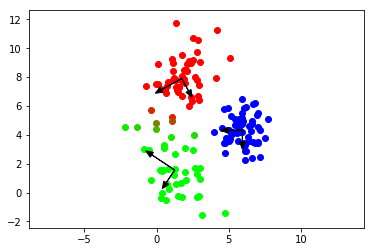

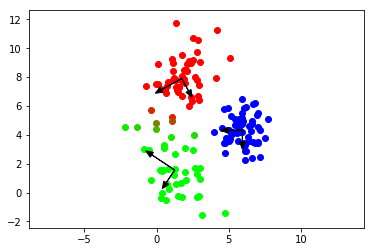

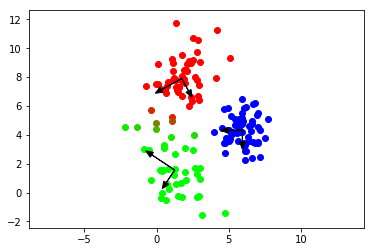

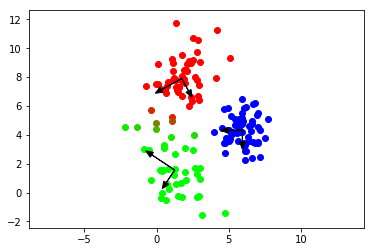

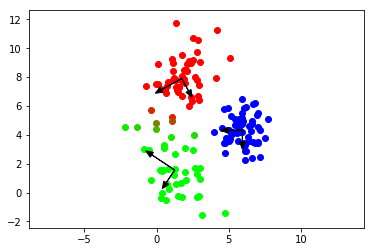

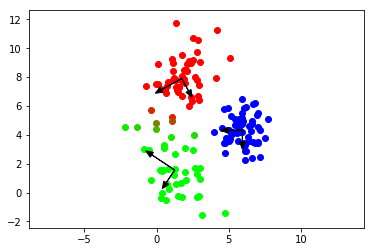

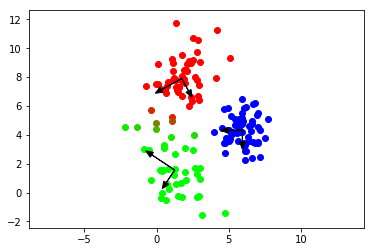

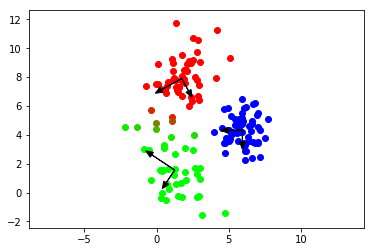

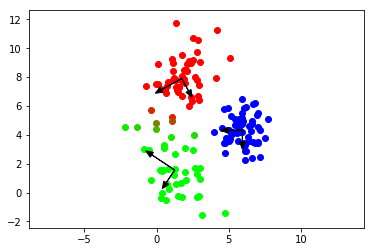

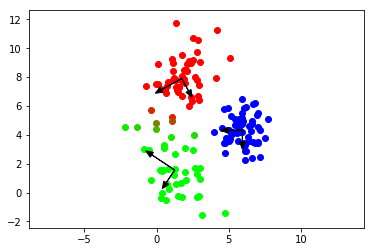

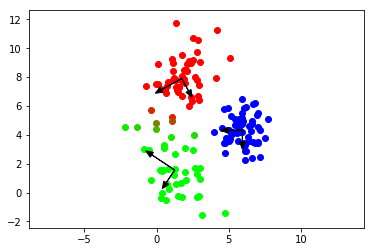

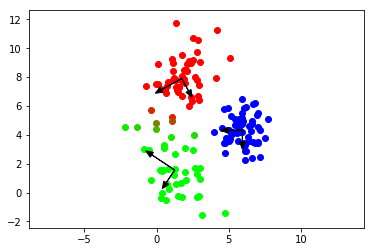

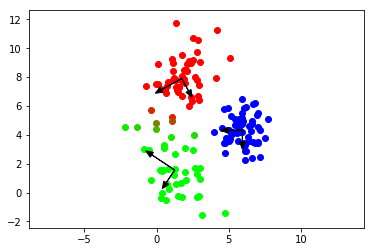

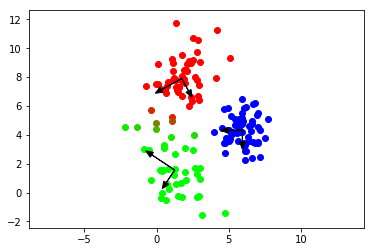

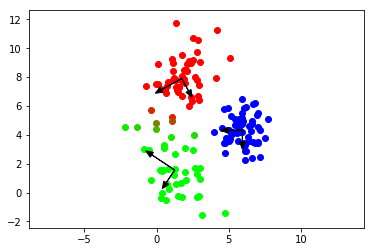

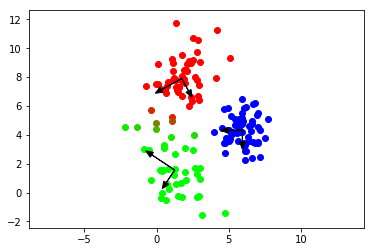

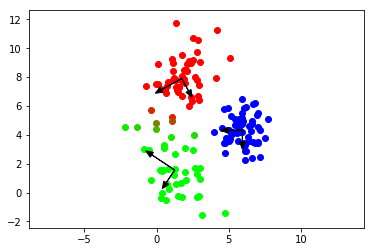

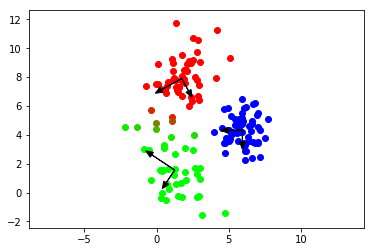

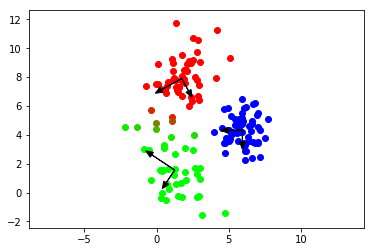

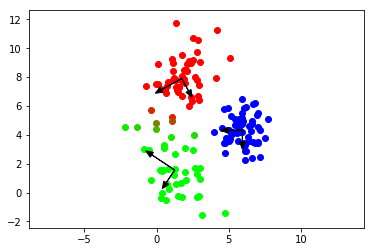

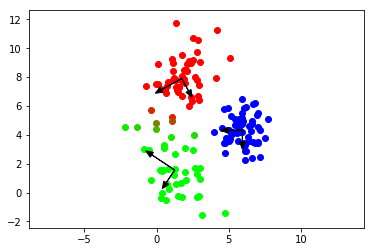

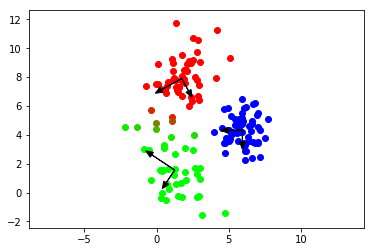

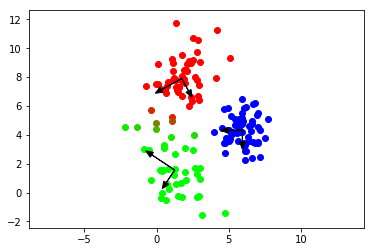

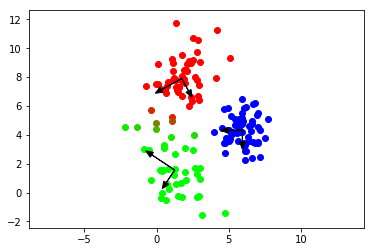

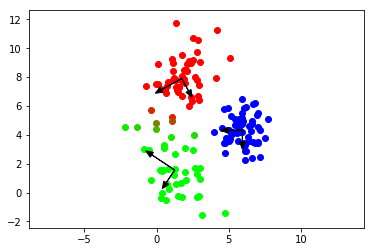

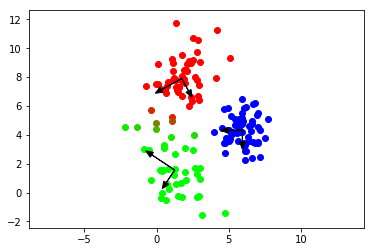

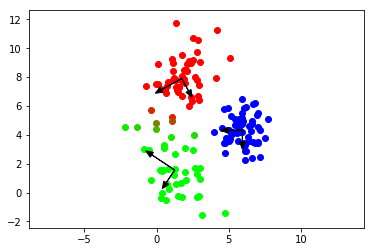

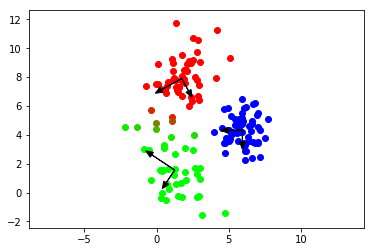

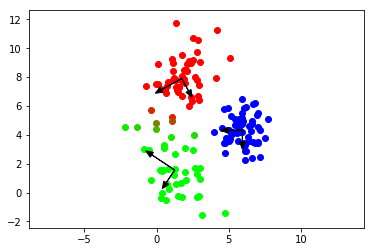

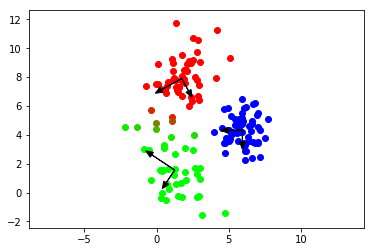

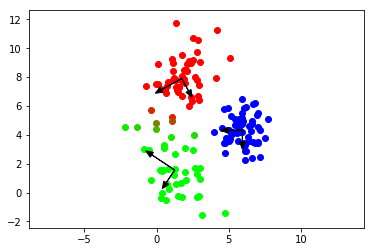

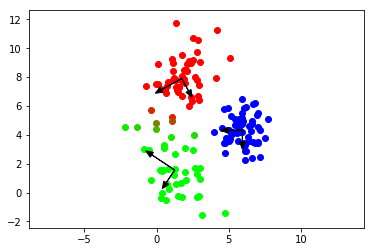

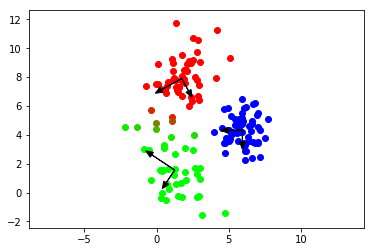

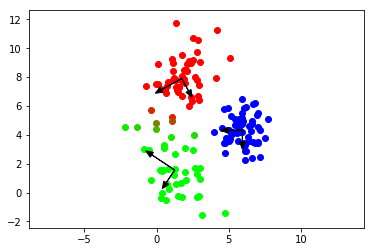

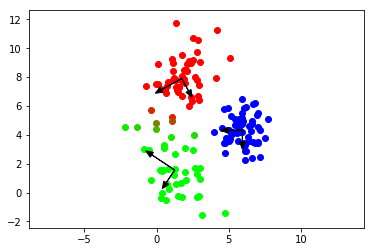

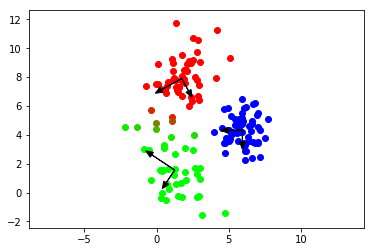

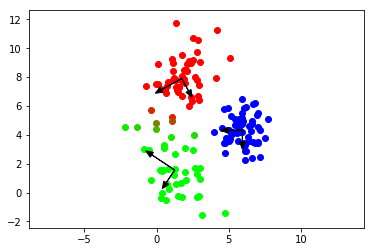

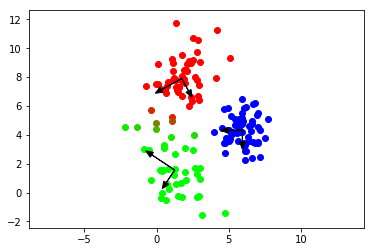

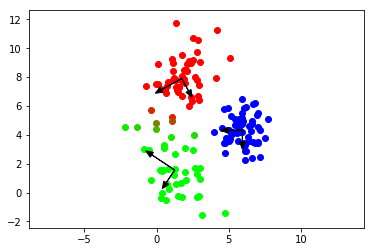

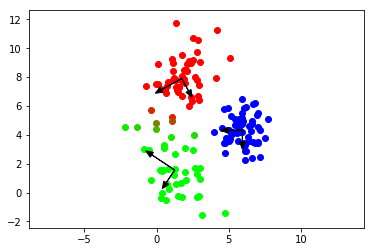

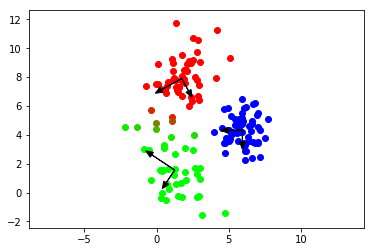

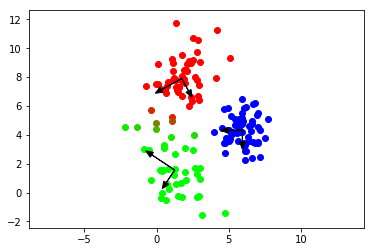

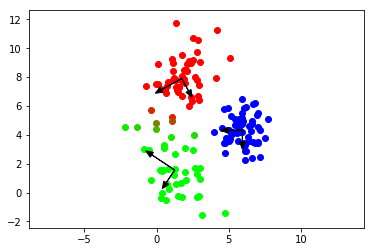

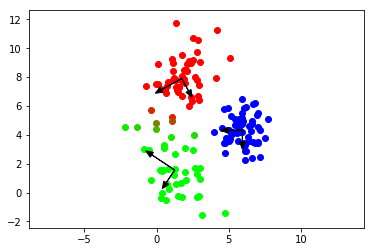

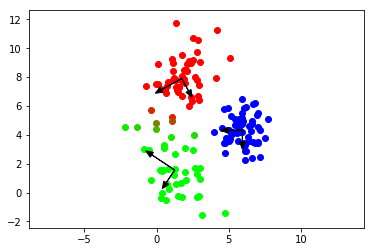

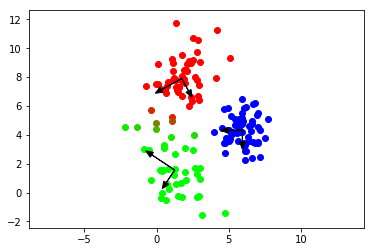

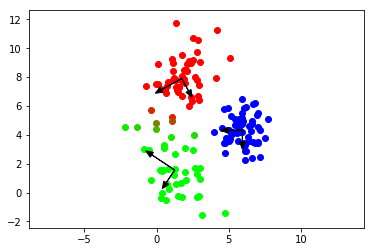

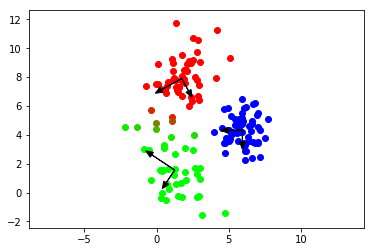

In [12]:
n_iterations = 100

# pick initial values
mu = X[np.random.choice(X.shape[0], K)]
cov = np.array([[[3., 0.], [0., 1.]]] * K)
pi = [1/K]*K

gamma = np.empty((X.shape[0], K)) # soft assignments

for i in range(n_iterations):
    # assign points - expectation
    for j in range(N):
        g_j = []
        for k in range(K):
            g_j.append(pi[k]* multivariate_normal(mu[k], cov[k]).pdf(X[j]))
        gamma[j] = np.array(g_j) / np.sum(g_j)

    # draw
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for j in range(N):
        scatter = ax.scatter(
            X[j,0],
            X[j,1],
            color=gamma[j]
        )
    for k in range(K):
        w, v = np.linalg.eig(cov[k])
        plt.arrow(*mu[k], *v[0]*w[0]**0.5, head_width=0.4, head_length=0.5, fc='black')
        plt.arrow(*mu[k], *v[1]*w[1]**0.5, head_width=0.4, head_length=0.5, fc='black')
    ax.set_aspect('equal', 'datalim')
    plt.show()

    # update parameters - maximization
    N_k = np.sum(gamma, axis=0)
    z = None
    for k in range(K):
        mu[k] = np.average(X, weights=gamma[:, k], axis=0)
        r = X - [mu[k]]
        rss = np.array([np.matmul(np.transpose([r[i]]), [r[i]]) for i in range(N)])
        cov[k] = np.average(rss, weights=gamma[:, k], axis=0)
        pi = [N_k[i]/N for i in range(K)]

In [6]:
for k in range(K):
    print("k={}".format(k))
    print(mu[k])
    print(cov[k])

k=0
[5.93440935 4.32383279]
[[0.66299352 0.00234234]
 [0.00234234 0.98647857]]
k=1
[1.73007614 7.9033835 ]
[[1.34309355 0.66620897]
 [0.66620897 2.1621857 ]]
k=2
[1.24800965 1.56250006]
[[ 1.88330443 -1.15670429]
 [-1.15670429  2.85423624]]


## References

- https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f
- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html